In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.safari.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.keys import Keys
import pandas as pd
import re
import requests
import pickle

In [ ]:
### Start by setting up the webdriver
driver = webdriver.Safari()
time.sleep(5)
driver.maximize_window()
driver.get("https://www.iwantgreatcare.org/")
time.sleep(5)

In [ ]:
### Find the location bar, type bar, enter values into both of them and hit search

### This little bit of code tells the page to wait until everything is visible.

time.sleep(5)

### get rid of cookies because apparently that is the only way to make this work

WebDriverWait(driver, 30).until(expected_conditions.visibility_of_element_located((By.ID, 'CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll')))
popup_accept = driver.find_element(By.ID, 'CybotCookiebotDialogBodyButtonDecline')
time.sleep(5)
ActionChains(driver) \
    .click(popup_accept) \
    .perform()
time.sleep(2)

ActionChains(driver)\
    .send_keys(Keys.RETURN)\
    .perform()
time.sleep(5)

### find query bar
WebDriverWait(driver, 50).until(expected_conditions.visibility_of_element_located((By.ID, 'near_text')))

time.sleep(5)
query_elem = driver.find_element(By.ID, 'search')
time.sleep(5)

### click on query bar
ActionChains(driver) \
    .click(query_elem) \
    .perform()
time.sleep(2)

### tell the driver to use the query bar to search for a hospital
ActionChains(driver)\
    .send_keys('hospital')\
    .perform()
time.sleep(2)

### find the search button

WebDriverWait(driver, 50).until(expected_conditions.visibility_of_element_located((By.ID, 'search-button-wrapper')))
search_button = driver.find_element(By.ID, 'search-button-wrapper')
time.sleep(2)
ActionChains(driver) \
    .click(search_button) \
    .perform()
time.sleep(2)


In [ ]:
link = driver.current_url
time.sleep(10)
driver.delete_all_cookies()
time.sleep(1)
driver.quit()
time.sleep(2)

In [ ]:
### now click the part that mentions hospitals
go = True
while go:
    driver = webdriver.Safari()
    time.sleep(2)
    driver.get(link)
    time.sleep(2)
    driver.refresh()
    time.sleep(2)
    a_tags = driver.find_elements(By.TAG_NAME, 'a')
    unique_elements = []
    i = 0
    for item in a_tags:
        unique_elements.append([item,i])
        i+=1
    for element in unique_elements:
        soup = BeautifulSoup(element[0].get_attribute('outerHTML'))
        drilled = soup.html.body
        text = drilled.get_text()
        if text == 'Hospitals':
            index = element[1]
    try:
        if index > 0:
            go = False
    except:
        driver.quit()

In [ ]:
### now use the href to access that page.

### save the href
time.sleep(2)
a = unique_elements[index][0].get_attribute('outerHTML')
soup = BeautifulSoup(a)
search = soup.html.body.find()
atts = search.attrs
href = atts['href']

### this part needs to involve clicking, not get linking.

### refresh this page.
driver.quit()
time.sleep(5)

### reopen it using the href.
driver = webdriver.Safari()
time.sleep(2)
driver.get(('https://www.iwantgreatcare.org' + href))
time.sleep(5)

In [ ]:
run = True
i = 2
hrefs = []
refresher = 0
while run:
    refresher+=1
    ### start the driver
    time.sleep(2)
    driver.refresh
    time.sleep(2)

    ### grab the links to hospital reviews
    coltexts = driver.find_elements(By.TAG_NAME,'h5')
    time.sleep(5)
    for element in coltexts:
        raw_html = element.get_attribute('outerHTML')
        soup = BeautifulSoup(raw_html)
        search = soup.html.body.h5.find()
        atts = search.attrs
        hrefs.append('https://www.iwantgreatcare.org' + atts['href'])

    ### find the next page
    go = False
    next_button = driver.find_elements(By.TAG_NAME, 'span')
    for element in next_button:
        if go == True:
            break
        raw_html = element.get_attribute('outerHTML')
        soup = BeautifulSoup(raw_html)
        try:
            search = soup.body.span.find()
            atts = search.attrs
            a = '/search?search=hospital&page='+str(i)
            search = atts['href'].find(a)
            ### print('----------------')
            ### print(atts['href'])
            if search != -1:
                click_me = 'https://www.iwantgreatcare.org/search?search=hospital&page='+str(i)
                go = True
        except:
            pass
    i+=1
    ### if it can't find the next page, then end the loop.
    right_panel = driver.find_element(By.XPATH, '//*[@id="resultsbox"]/div[1]/div/div[2]')
    time.sleep(1)
    soup_right_panel = BeautifulSoup(right_panel.get_attribute('outerHTML'))
    text = soup_right_panel.body.div.span.text
    split = text.find('of')
    last_no = text[split+3:]
    first_no = text[5:split-1]
    if first_no == last_no:
        run = False
    ### otherwise, click on the next page button
    else:
        driver.refresh()
        time.sleep(2)
        driver.get(click_me)
        response = requests.get(click_me)
        if response.status_code == 403:
            time.sleep(300)
            driver.get(click_me)
        else:
            pass

In [ ]:
### end da driver
driver.quit()

In [ ]:
### set up a nice big list of reviews
reviews = []
titles = []
avg_rating = []
dates = []

In [ ]:
driver = webdriver.Safari()

In [ ]:
# 0
j = 0

In [ ]:
### use hrefs list to search
ITERATOR = -1
for href in hrefs:
    # loop through hospitals
    if ITERATOR == 0:
        break
    ITERATOR+=1
    stop_here = -1
    load_up = True
    try:
        driver = webdriver.Safari()
    except:
        driver.quit()
        time.sleep(1)
        driver = webdriver.Safari()
    time.sleep(1)
    while load_up:
        try:
            driver.get(href)
            load_up = False
        except:
            try:
                driver.quit()
            except:
                pass
    time.sleep(1)

    ### check if there are actually any reviews
    no_of_reviews = driver.find_element(By.CLASS_NAME, 'entity-reviews-count')
    soup = BeautifulSoup(no_of_reviews.get_attribute('outerHTML'))
    number = soup.a.span.text.strip()
    number_list = number.split(',')
    number = ''
    for item in number_list:
        number = number+item
    if number == '0':
        # no reviews, move to next hospital
        loop = False
        driver.quit()
    elif int(number) <= 10:
        # reviews under 11, (one page, then move on)
        stop_here = -1
        boxes = driver.find_elements(By.CLASS_NAME, "review-text-container")
        time.sleep(2)
        for box in boxes:
            cont_rest = True
            soup = BeautifulSoup(box.get_attribute('outerHTML'))
            # dates
            child = soup.div.div.div
            siblings = child.next_siblings
            for child in child.next_siblings:
                try:
                    atts = child.attrs
                    if atts['class'] == ['review-date']:
                        last_two = child.text[-2:]
                        if int(last_two) < 20:
                            cont_rest = False
                        else:
                            dates.append(child.text)
                except:
                    pass
            if cont_rest:
                # review
                P = soup.div.p.text
                reviews.append(P)
                # names
                span_1 = soup.div.span.text
                titles.append(span_1)
                # avg rating
                try:
                    img = soup.img
                    img_atts = img.attrs
                    rating_string = img_atts['title']
                    rating = rating_string.strip(' Stars')
                    avg_rating.append(rating)
                except:
                    avg_rating.append(5.0)
        driver.quit()
        loop = False
    else:
        loop = True
    ### loop through hospital review pages
    while loop:
        # serialise Python object in case of crash
        with open('reviews_pickle','wb') as f:
            pickle.dump(reviews,f)
        with open('titles_pickle','wb') as f:
            pickle.dump(titles,f)
        with open('avg_rating_pickle','wb') as f:
            pickle.dump(avg_rating,f)
        with open('dates_pickle','wb') as f:
            pickle.dump(dates,f)
        j+=1
        boxes = driver.find_elements(By.CLASS_NAME, "review-text-container")
        time.sleep(2)
        for box in boxes:
            cont_rest = True
            soup = BeautifulSoup(box.get_attribute('outerHTML'))
            # dates
            child = soup.div.div.div
            siblings = child.next_siblings
            for child in child.next_siblings:
                try:
                    atts = child.attrs
                    if atts['class'] == ['review-date']:
                        last_two = child.text[-2:]
                        if int(last_two) < 20:
                            cont_rest = False
                        else:
                            dates.append(child.text)
                except:
                    pass
            if cont_rest:
                # review
                P = soup.div.p.text
                reviews.append(P)
                # names
                span_1 = soup.div.span.text
                titles.append(span_1)
                # avg rating
                try:
                    # regular reviews
                    img = soup.img
                    img_atts = img.attrs
                    rating_string = img_atts['title']
                    rating = rating_string.strip(' Stars')
                    avg_rating.append(rating)
                except:
                    # "say thank you" reviews
                    avg_rating.append(5.0)
        
        if cont_rest:
            pass
        else:
            driver.quit()
            loop = False
        
        ### go to the next page
        if j == 1:
            pass
        else:
            driver.quit()
            time.sleep(1)
            driver = webdriver.Safari()
            time.sleep(1)
            a = (href[:58]+'?page='+str(j))
            driver.get(a)
            time.sleep(1)
        try:
            WebDriverWait(driver, 50).until(expected_conditions.visibility_of_element_located((By.CLASS_NAME, 'right')))
            div_right = driver.find_element(By.CLASS_NAME, 'right')

            raw_html = div_right.get_attribute('outerHTML')
            soup = BeautifulSoup(raw_html)
            text = soup.text
            of_index = text.find('of ')
            last_number = text[of_index+3:].strip('\n')
            spans = driver.find_elements(By.TAG_NAME, 'span')
            for item in spans:
                soup = BeautifulSoup(item.get_attribute('outerHTML'))
                try:
                    text = soup.a.text
                    if text == '›':
                        atts = soup.body.span.a.attrs
                        link = str(href[:58]) + atts['href']
                        number = atts['href'][6:]
                except:
                    pass
            if number != last_number:
                load_up = True
                driver.refresh()
                time.sleep(1)
                while load_up:
                    try:
                        driver.get(link)
                        time.sleep(1)
                        load_up = False
                    except:
                        try:
                            driver.quit()
                            load_up = False
                        except:
                            pass
                driver.refresh()
                time.sleep(1)
            else:
                loop = False
                driver.quit()
        except:
            loop = False
            driver.quit()

In [ ]:
dataframe = pd.DataFrame()
dataframe['titles'] = titles
dataframe['reviews'] = reviews
dataframe['avg_ratings'] = avg_rating
dataframe['dates'] = dates

dataframe.to_csv('national_results')

In [ ]:
# 1.Cleaning the data

In [173]:
# drop first four columns (these are due to the csv being created beforehand using the concat function of pandas -
# python kernel crashed a few times due to machine limitations, the code should work perfectly on a more robust machine

import pandas as pd

df = pd.read_csv("queens_hospital_2020_2025")
df.drop(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis='columns', inplace = True)
df

,titles,reviews,avg_ratings,dates
0,Queen's Hospital \n,Excellent service and staff,5.0,14th February 2025
1,Queen's Hospital \n,I was looked after very well,5.0,14th February 2025
2,Queen's Hospital \n,They answered all questions that I asked and l...,5.0,14th February 2025
3,Queen's Hospital \n,Dr Saris was very informative of the care that...,4.5,12th February 2025
4,Queen's Hospital \n,From first contacting 111 to discharge the tre...,5.0,12th February 2025
...,...,...,...,...
114156,Queen's Hospital \n,NaN,5.0,3rd January 2020
114157,Queen's Hospital \n,"Very well organised and timely, little waiting...",5.0,3rd January 2020
114158,Queen's Hospital \n,Please see my personal views and comments rega...,5.0,3rd January 2020
114159,Queen's Hospital \n,I had a bone scan at the nuclear medicine depa...,5.0,2nd January 2020


In [175]:
# feature engineering

# remove \n from titles - same title as one hospital.

remove_n = lambda title: title.strip('                \n')
df.titles = df.titles.apply(remove_n)

df

,titles,reviews,avg_ratings,dates
0,Queen's Hospital,Excellent service and staff,5.0,14th February 2025
1,Queen's Hospital,I was looked after very well,5.0,14th February 2025
2,Queen's Hospital,They answered all questions that I asked and l...,5.0,14th February 2025
3,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025
4,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025
...,...,...,...,...
114156,Queen's Hospital,NaN,5.0,3rd January 2020
114157,Queen's Hospital,"Very well organised and timely, little waiting...",5.0,3rd January 2020
114158,Queen's Hospital,Please see my personal views and comments rega...,5.0,3rd January 2020
114159,Queen's Hospital,I had a bone scan at the nuclear medicine depa...,5.0,2nd January 2020


In [177]:
# remove NaNs from df

index_list = []
index = []

def nan_index(review):
    if type(review) != str:
        index_list.append(len(index))
    index.append(0)

df.reviews.apply(nan_index)

for index_iterator in index_list:
    df.drop([index_iterator], inplace=True)

df

,titles,reviews,avg_ratings,dates
0,Queen's Hospital,Excellent service and staff,5.0,14th February 2025
1,Queen's Hospital,I was looked after very well,5.0,14th February 2025
2,Queen's Hospital,They answered all questions that I asked and l...,5.0,14th February 2025
3,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025
4,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025
...,...,...,...,...
114155,Queen's Hospital,Everything was excellent the nurses was comfor...,5.0,3rd January 2020
114157,Queen's Hospital,"Very well organised and timely, little waiting...",5.0,3rd January 2020
114158,Queen's Hospital,Please see my personal views and comments rega...,5.0,3rd January 2020
114159,Queen's Hospital,I had a bone scan at the nuclear medicine depa...,5.0,2nd January 2020


In [178]:
# realign index

df['index'] = range(0,len(df))
df.set_index('index',inplace=True)
df

,titles,reviews,avg_ratings,dates
index,,,,
0,Queen's Hospital,Excellent service and staff,5.0,14th February 2025
1,Queen's Hospital,I was looked after very well,5.0,14th February 2025
2,Queen's Hospital,They answered all questions that I asked and l...,5.0,14th February 2025
3,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025
4,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025
...,...,...,...,...
84671,Queen's Hospital,Everything was excellent the nurses was comfor...,5.0,3rd January 2020
84672,Queen's Hospital,"Very well organised and timely, little waiting...",5.0,3rd January 2020
84673,Queen's Hospital,Please see my personal views and comments rega...,5.0,3rd January 2020


In [179]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/agunikkirakosian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/agunikkirakosian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/agunikkirakosian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [180]:
import contractions
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Function to expand contractions using the 'contractions' library
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean the text
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        text = expand_contractions(text)
        
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"@\w+|\#", "", text)  # Remove mentions
        text = re.sub(r"[^a-z\s]", "", text)  # Remove non-alphabetic characters
        
        tokens = text.split()  # Using split instead of word_tokenize() for simplicity
        words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        
        return " ".join(words)
    return ""


df["cleaned"] = df["reviews"].apply(clean_text)
print("\nCleaned Text:")
print(df["cleaned"])


Cleaned Text:
index
0                                  excellent service staff
1                                              looked well
2                      answered question asked looked need
3        dr sari informative care required vacillating ...
4        first contacting discharge treatment received ...
                               ...                        
84671           everything excellent nurse comforting kind
84672    well organised timely little waiting around go...
84673    please see personal view comment regarding dr ...
84674    bone scan nuclear medicine department establis...
84675    hospital treat full respect staff also caring ...
Name: cleaned, Length: 84676, dtype: object


In [181]:
# download cleaned df as csv for storage

df[['cleaned']].to_csv('CleanText.csv', index=False)


In [182]:
# 2.SENTENCES' POLARITY ANALYSIS

In [183]:
from textblob import TextBlob
import pandas as pd
from IPython.display import display


sentiment_data = []
for review in df.cleaned:
    sentiment_score = TextBlob(review).sentiment.polarity
    sentiment_label = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"
    sentiment_data.append([review, sentiment_score, sentiment_label])

sentiment_df = pd.DataFrame(sentiment_data, columns=["Review", "Sentiment Score", "Overall Sentiment"])

display(sentiment_df)

,Review,Sentiment Score,Overall Sentiment
0,excellent service staff,1.000000,Positive
1,looked well,0.000000,Neutral
2,answered question asked looked need,0.000000,Neutral
3,dr sari informative care required vacillating ...,0.000000,Neutral
4,first contacting discharge treatment received ...,0.716667,Positive
...,...,...,...
84671,everything excellent nurse comforting kind,0.800000,Positive
84672,well organised timely little waiting around go...,0.461458,Positive
84673,please see personal view comment regarding dr ...,0.000000,Neutral
84674,bone scan nuclear medicine department establis...,0.633333,Positive


In [184]:
positive_counter = 0
negative_counter = 0
neutral_counter = 0

for sentiment in sentiment_df["Overall Sentiment"]:
    if sentiment == "Positive":
        positive_counter +=1
    if sentiment == "Negative":
        negative_counter +=1
    if sentiment == "Neutral":
        neutral_counter +=1

print("the number of postive sentiments: " + str(positive_counter))
print("the number of negative sentiments: " + str(negative_counter))
print("the number of neutral sentiments: " + str(neutral_counter))

the number of postive sentiments: 62423
the number of negative sentiments: 5814
the number of neutral sentiments: 16439


/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_8746/720812486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')


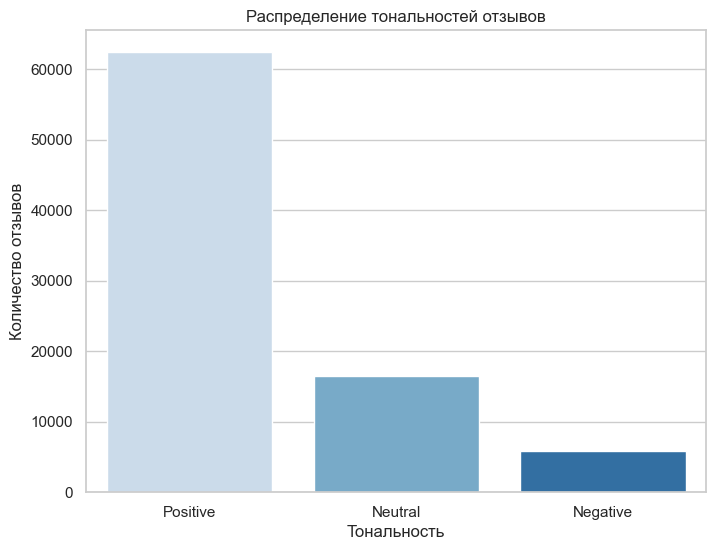

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns


sentiment_counts = sentiment_df["Overall Sentiment"].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')

plt.title('Распределение тональностей отзывов')
plt.xlabel('Тональность')
plt.ylabel('Количество отзывов')


plt.show()


In [186]:
#TF-ID ANALYSIS

dfcopy = df.copy()
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=15)
tfidf_matrix = vectorizer.fit_transform(dfcopy['cleaned'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
display(tfidf_df)

,care,caring,doctor,friendly,good,helpful,hour,kind,nurse,service,staff,thank,time,treated,well
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.856319,0.516447,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.390903,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.920432,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84671,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.751988,0.659177,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
84672,0.000000,0.000000,0.000000,0.0,0.588933,0.0,0.0,0.000000,0.000000,0.000000,0.443780,0.0,0.000000,0.000000,0.675439
84673,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
84674,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.244447,0.0,0.375058,0.813114,0.372053


In [187]:
#3.MORPHOLOGICAL ANALYSIS

In [188]:
!pip install spacy textblob 

!python -m spacy download en_core_web_sm

import spacy
from textblob import TextBlob

nlp = spacy.load("en_core_web_sm")

def adj_extraction(text):
    doc = nlp(text)
    adj = [token.text for token in doc if token.pos_ == "ADJ"]
    return adj

df["adj"] = df["cleaned"].apply(adj_extraction)
df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.3 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


,titles,reviews,avg_ratings,dates,cleaned,adj
index,,,,,,
0,Queen's Hospital,Excellent service and staff,5.0,14th February 2025,excellent service staff,[excellent]
1,Queen's Hospital,I was looked after very well,5.0,14th February 2025,looked well,[]
2,Queen's Hospital,They answered all questions that I asked and l...,5.0,14th February 2025,answered question asked looked need,[]
3,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025,dr sari informative care required vacillating ...,"[informative, speedy, unacceptable, much]"
4,Queen's Hospital,From first contacting 111 to discharge the tre...,5.0,12th February 2025,first contacting discharge treatment received ...,[]
...,...,...,...,...,...,...
84671,Queen's Hospital,Everything was excellent the nurses was comfor...,5.0,3rd January 2020,everything excellent nurse comforting kind,[excellent]
84672,Queen's Hospital,"Very well organised and timely, little waiting...",5.0,3rd January 2020,well organised timely little waiting around go...,"[little, good, pleasant, kindly]"
84673,Queen's Hospital,Please see my personal views and comments rega...,5.0,3rd January 2020,please see personal view comment regarding dr ...,[personal]


In [211]:
# 4. Emotional Adjectives (extraction)

In [213]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def is_emotional_vader(adjective):
    score = analyzer.polarity_scores(adjective)
    if score["pos"]== 1:
        return [adjective, "positive"]
    elif score["neg"] == 1:
        return [adjective, "negative"]
    else:
        pass

big_list = []
def emotion_checker(list_adj):
    new_list = []
    for adj in list_adj:
        score = analyzer.polarity_scores(adj)
        if score["neu"] == 1:
            pass
        else:
            new_list.append(is_emotional_vader(adj))
    big_list.append(new_list)

df.adj.apply(emotion_checker)
ids = list(range(0,len(big_list)))
appendage_df = pd.DataFrame({
    'id': ids,
    'data': big_list
})

df["emotional_adjectives"] = appendage_df.data

# another index reset

df['index'] = range(0,len(df))
df.set_index('index',inplace=True)

deletion = []
def indexes_to_delete(index):
    if len(df.iloc[index].emotional_adjectives) == 0:
        deletion.append(index)
index = list(df.index)
for indexes in index:
    indexes_to_delete(indexes)
for indexes in deletion:
    df.drop([indexes], inplace = True)
df


,titles,reviews,avg_ratings,dates,cleaned,adj,emotional_adjectives
index,,,,,,,
0,Queen's Hospital,Excellent service and staff,5.0,14th February 2025,excellent service staff,[excellent],"[[excellent, positive]]"
3,Queen's Hospital,Dr Saris was very informative of the care that...,4.5,12th February 2025,dr sari informative care required vacillating ...,"[informative, speedy, unacceptable, much]","[[unacceptable, negative]]"
5,Queen's Hospital,Everyone was extremely kind and supportive to ...,5.0,12th February 2025,everyone extremely kind supportive even though...,"[supportive, busy, low, happy, grateful]","[[supportive, positive], [low, negative], [hap..."
6,Queen's Hospital,The communication between the different depart...,4.0,12th February 2025,communication different department poor lead c...,"[different, poor]","[[poor, negative]]"
8,Queen's Hospital,Doctor and staff were waiting for me when I ar...,5.0,12th February 2025,doctor staff waiting arrived ambulance concern...,"[friendly, efficient]","[[friendly, positive], [efficient, positive]]"
...,...,...,...,...,...,...,...
84669,Queen's Hospital,The only downside is the lack of sleep you get...,5.0,3rd January 2020,downside lack sleep get night much going need ...,"[downside, much, good]","[[downside, negative], [good, positive]]"
84670,Queen's Hospital,Very quick and staff were efficient and friend...,5.0,3rd January 2020,quick staff efficient friendly impressed,"[quick, efficient]","[[efficient, positive]]"
84671,Queen's Hospital,Everything was excellent the nurses was comfor...,5.0,3rd January 2020,everything excellent nurse comforting kind,[excellent],"[[excellent, positive]]"


In [73]:
#FREQUENCY

In [215]:
positive_counter = 0
negative_counter = 0


for emotional_list in df.emotional_adjectives:
    for adjective in emotional_list:
        if adjective[1] == "positive":
            positive_counter +=1
        if adjective[1] == "negative":
            negative_counter +=1
            

print("the number of postive adjectives: " + str(positive_counter))
print("the number of negative adjectives: " + str(negative_counter))

the number of postive adjectives: 81291
the number of negative adjectives: 10408


/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_8746/439740060.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette='coolwarm')


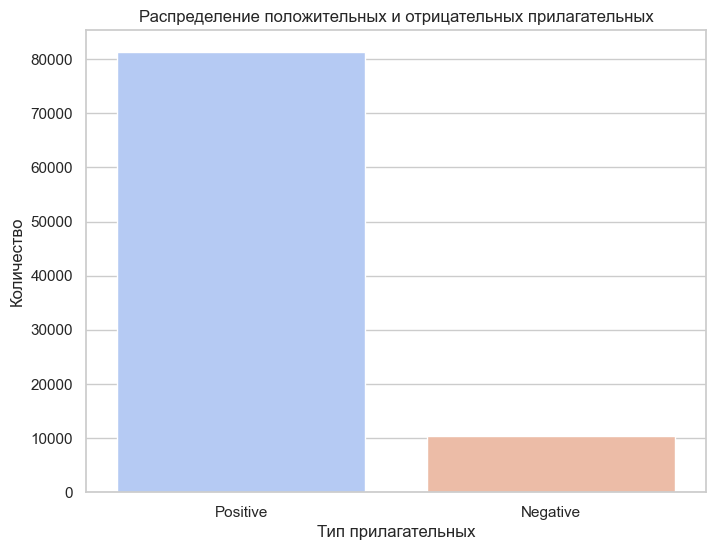

In [217]:
sentiment_counts = {"Positive": positive_counter, "Negative": negative_counter}


plt.figure(figsize=(8, 6))


sns.barplot(x=list(sentiment_counts.keys()), y=list(sentiment_counts.values()), palette='coolwarm')


plt.title('Распределение положительных и отрицательных прилагательных')
plt.xlabel('Тип прилагательных')
plt.ylabel('Количество')


plt.show()


In [219]:
df_copy = df.copy()
df = df.explode("emotional_adjectives")

In [221]:
#Overall analysis of the Absolute frequency

absolute_freq = df["emotional_adjectives"].value_counts()
print("Absolute Frequency:\n", absolute_freq)


Absolute Frequency:
 emotional_adjectives
[good, positive]            12702
[helpful, positive]          9021
[friendly, positive]         7618
[excellent, positive]        5332
[great, positive]            4609
                            ...  
[unkind, negative]              1
[ethical, positive]             1
[moody, negative]               1
[passive, positive]             1
[questionable, negative]        1
Name: count, Length: 760, dtype: int64


In [223]:
# extraction of the positive and negative indexes
pos_adjectives = []
neg_adjectives = []
index = 0
positive_indexes = []
negative_indexes = []
for adjectives in absolute_freq.index:
    if adjectives[1] == "positive":
        pos_adjectives.append(adjectives)
        positive_indexes.append(index)
    else:
        neg_adjectives.append(adjectives)
        negative_indexes.append(index)
    index += 1   

pos_adjectives_dataframe = pd.DataFrame(pos_adjectives,columns=['words','values'])
pos_adjectives_dataframe

,words,values
0,good,positive
1,helpful,positive
2,friendly,positive
3,excellent,positive
4,great,positive
...,...,...
372,perfectionist,positive
373,convinced,positive
374,playfulness,positive
375,ethical,positive


In [17]:
# negative absolute polarity dataframe, for reference
neg_adjectives_dataframe = pd.DataFrame(neg_adjectives,columns=['words','values'])
neg_adjectives_dataframe

,words,values
0,poor,negative
1,bad,negative
2,difficult,negative
3,hard,negative
4,wrong,negative
...,...,...
378,vicious,negative
379,insincere,negative
380,unkind,negative
381,moody,negative


In [225]:
# extraction of the positive and negative adjectives for the Absolute frequency

pos_absolute = []
neg_absolute = []
iterator = 0
for adjectives in absolute_freq.values:
    if iterator in positive_indexes:
        pos_absolute.append([absolute_freq.index[iterator][0], adjectives])
    else:
        neg_absolute.append([absolute_freq.index[iterator][0], adjectives])
    iterator +=1

pos_absolute_dataframe = pd.DataFrame(pos_absolute,columns=['words','values'])
pos_absolute_dataframe

,words,values
0,good,12702
1,helpful,9021
2,friendly,7618
3,excellent,5332
4,great,4609
...,...,...
372,perfectionist,1
373,convinced,1
374,playfulness,1
375,ethical,1


In [19]:
# negative absolute frequency dataframe
neg_absolute_dataframe = pd.DataFrame(neg_absolute,columns=['words','values'])
neg_absolute_dataframe

,words,values
0,poor,674
1,bad,648
2,difficult,521
3,hard,490
4,wrong,435
...,...,...
378,vicious,1
379,insincere,1
380,unkind,1
381,moody,1


In [227]:
#Overall analysis of the Relative frequency

relative_freq = df["emotional_adjectives"].value_counts(normalize = True)
print("\nRelative Frequency: \n", relative_freq)


Relative Frequency: 
 emotional_adjectives
[good, positive]            0.138518
[helpful, positive]         0.098376
[friendly, positive]        0.083076
[excellent, positive]       0.058147
[great, positive]           0.050262
                              ...   
[unkind, negative]          0.000011
[ethical, positive]         0.000011
[moody, negative]           0.000011
[passive, positive]         0.000011
[questionable, negative]    0.000011
Name: proportion, Length: 760, dtype: float64


In [229]:
# extraction of the positive and negative adjectives for the Relative frequency (lists)
pos_values = []
neg_values = []
iterator = 0
for adjectives in relative_freq.values:
    if iterator in positive_indexes:
        pos_values.append([relative_freq.index[iterator][0], adjectives])
    else:
        neg_values.append([relative_freq.index[iterator][0], adjectives])
    iterator +=1

pos_values_dataframe = pd.DataFrame(pos_values,columns=['words','values'])
pos_values_dataframe


,words,values
0,good,0.138518
1,helpful,0.098376
2,friendly,0.083076
3,excellent,0.058147
4,great,0.050262
...,...,...
372,perfectionist,0.000011
373,convinced,0.000011
374,playfulness,0.000011
375,ethical,0.000011


In [231]:
# negative values dataframe
neg_values_dataframe = pd.DataFrame(neg_values,columns=['words','values'])
neg_values_dataframe

,words,values
0,poor,0.007350
1,bad,0.007067
2,difficult,0.005682
3,hard,0.005344
4,wrong,0.004744
...,...,...
378,vicious,0.000011
379,insincere,0.000011
380,unkind,0.000011
381,moody,0.000011


In [233]:
freq_df = pd.DataFrame({'Absolute Frequency': absolute_freq, 'Relative Frequency': relative_freq})
display(freq_df)

,Absolute Frequency,Relative Frequency
emotional_adjectives,,
"[good, positive]",12702,0.138518
"[helpful, positive]",9021,0.098376
"[friendly, positive]",7618,0.083076
"[excellent, positive]",5332,0.058147
"[great, positive]",4609,0.050262
...,...,...
"[unkind, negative]",1,0.000011
"[ethical, positive]",1,0.000011
"[moody, negative]",1,0.000011


In [235]:
# get first 20

# words and absolute frequencies
pos_words = []
neg_words = []
pos_absolute_extracted_dataframe = []
neg_absolute_extracted_dataframe = []

for entry in pos_absolute_dataframe.values:
    pos_words.append(entry[0])
    pos_absolute_extracted_dataframe.append(entry[1])
for entry in neg_absolute_dataframe.values:
    neg_words.append(entry[0])
    neg_absolute_extracted_dataframe.append(entry[1])

# relative frequencies
pos_values_extracted_dataframe = []
neg_values_extracted_dataframe = []

for entry in pos_values_dataframe.values:
    pos_values_extracted_dataframe.append(entry[1])
for entry in neg_values_dataframe.values:
    neg_values_extracted_dataframe.append(entry[1])

# array creation
first_20_positive_words = pos_words[:20]
first_20_negative_words = neg_words[:20]
first_20_positive_absolute = pos_absolute_extracted_dataframe[:20]
first_20_positive_relative = pos_values_extracted_dataframe[:20]
first_20_negative_absolute = neg_absolute_extracted_dataframe[:20]
first_20_negative_relative = neg_values_extracted_dataframe[:20]

/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_8746/1457821418.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_20_positive_words, y=first_20_positive_absolute, palette="viridis")


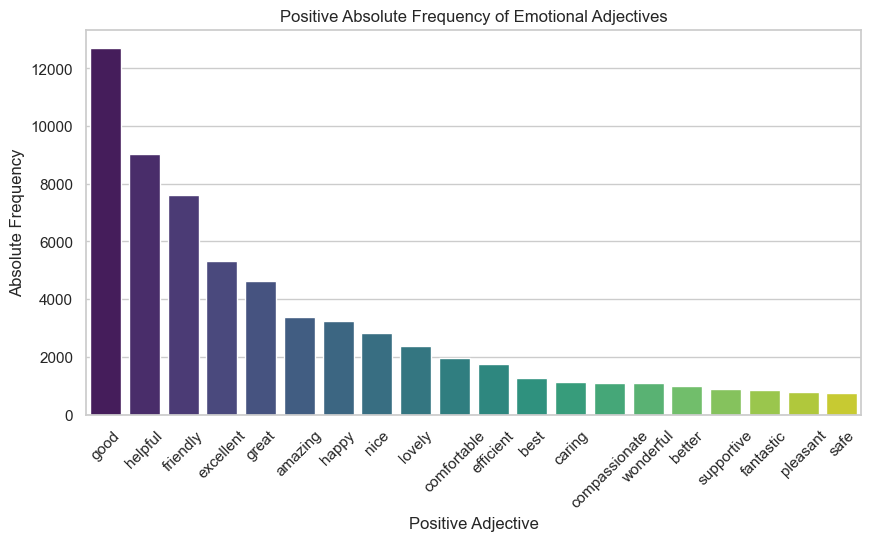

/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_8746/1457821418.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_20_positive_words, y=first_20_positive_relative, palette="magma")


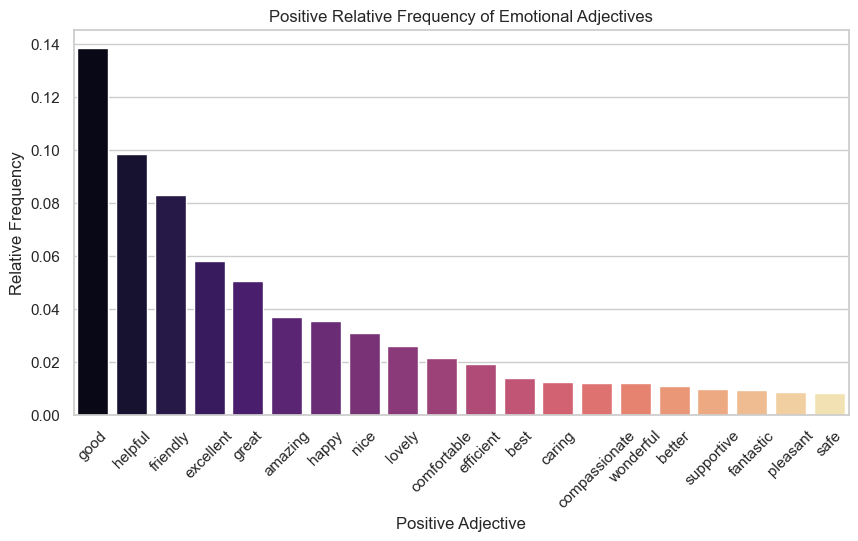

/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_8746/1457821418.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_20_negative_words, y=first_20_negative_absolute, palette="viridis")


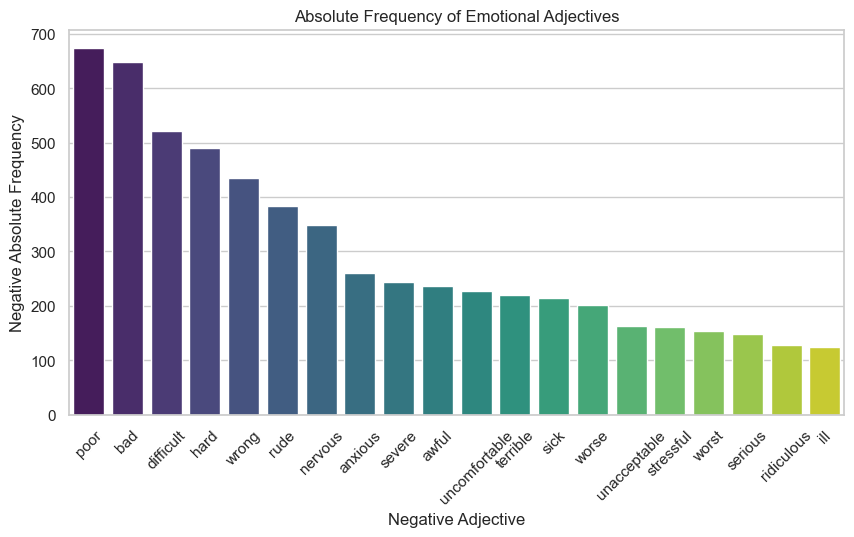

/var/folders/mb/c36w735d3y15n1095v443mq00000gn/T/ipykernel_8746/1457821418.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_20_negative_words, y=first_20_negative_relative, palette="magma")


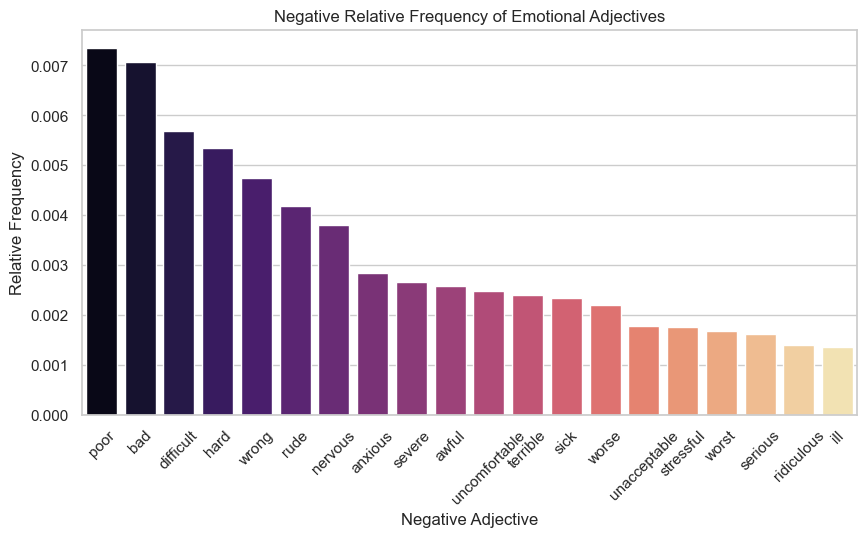

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style="whitegrid")

#Positive Absolute Freq
plt.figure(figsize=(10, 5))
sns.barplot(x=first_20_positive_words, y=first_20_positive_absolute, palette="viridis")
plt.xlabel("Positive Adjective")
plt.ylabel("Absolute Frequency")
plt.title("Positive Absolute Frequency of Emotional Adjectives")
plt.xticks(rotation=45)
plt.show()

#Positive Relative Freq
plt.figure(figsize=(10, 5))
sns.barplot(x=first_20_positive_words, y=first_20_positive_relative, palette="magma")
plt.xlabel("Positive Adjective")
plt.ylabel("Relative Frequency")
plt.title("Positive Relative Frequency of Emotional Adjectives")
plt.xticks(rotation=45)
plt.show()

#Negative Absolute Freq
plt.figure(figsize=(10, 5))
sns.barplot(x=first_20_negative_words, y=first_20_negative_absolute, palette="viridis")
plt.xlabel("Negative Adjective")
plt.ylabel("Negative Absolute Frequency")
plt.title("Absolute Frequency of Emotional Adjectives")
plt.xticks(rotation=45)
plt.show()

#Negative Relative Freq
plt.figure(figsize=(10, 5))
sns.barplot(x=first_20_negative_words, y=first_20_negative_relative, palette="magma")
plt.xlabel("Negative Adjective")
plt.ylabel("Relative Frequency")
plt.title("Negative Relative Frequency of Emotional Adjectives")
plt.xticks(rotation=45)
plt.show()

In [239]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [241]:
first_50_positive_words = pos_words[:50]
first_50_negative_words = neg_words[:50]

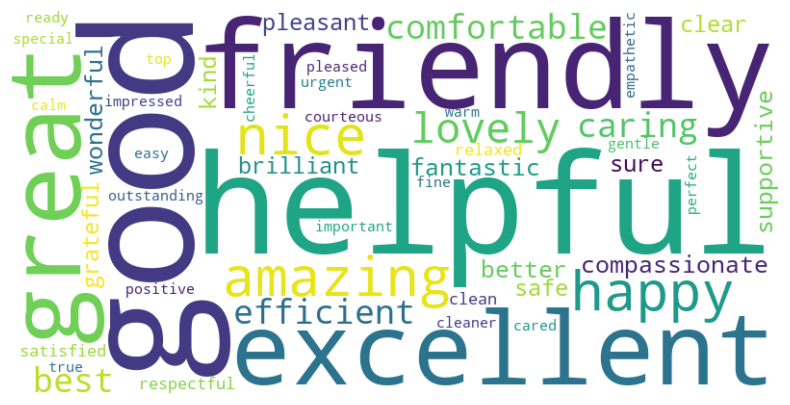

In [243]:
# Convert list to a single string where words appear with some frequency (optional)
text = " ".join(first_50_positive_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

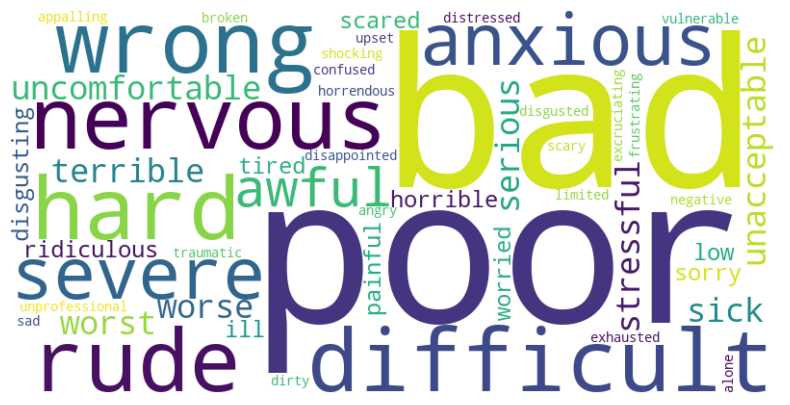

In [245]:
# Convert list to a single string where words appear with some frequency (optional)
text = " ".join(first_50_negative_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [267]:
# negative and positive extraction and evaluation
negative_list = []
positive_list = []

def neg_or_pos_checker(adj_tag):
    if adj_tag[1] == 'positive':
        positive_list.append(adj_tag[0])
    else:
        negative_list.append(adj_tag[0])

df.emotional_adjectives.apply(neg_or_pos_checker)
negative_list[:10]

['unacceptable',
 'low',
 'poor',
 'rude',
 'anti',
 'bad',
 'dirty',
 'empty',
 'hard',
 'horrible']

In [349]:
# bigrams
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(df.cleaned)

bigrams = vectorizer.get_feature_names_out()

pre_filtered_bigrams = pd.DataFrame(bigrams,columns=['bigrams'])
positive_filtered_for_df = []
negative_filtered_for_df = []
def filterer(bigram):
    splitram = bigram.split()
    for word in splitram:
        if word in positive_list:
            positive_filtered_for_df.append(bigram)
        if word in negative_list:
            negative_filtered_for_df.append(bigram)
            
pre_filtered_bigrams.bigrams.apply(filterer)

positive_bigram_df = pd.DataFrame(positive_filtered_for_df, columns=['positive_bigrams'])
positive_bigram_df.drop_duplicates(inplace=True)

negative_bigram_df = pd.DataFrame(negative_filtered_for_df, columns=['negative_bigrams'])
negative_bigram_df.drop_duplicates(inplace=True)


positive_bigram_df

,positive_bigrams
0,aafi playful
1,ab happy
2,ab super
3,abasing thank
4,abber thank
...,...
50220,zoe helpful
50221,zoey lovely
50222,zone excellent
50223,zubeida excellent


In [350]:
negative_bigram_df

,negative_bigrams
0,abandoned scared
1,abg painful
2,abhorrent name
3,ability agonising
4,abit disappointing
...,...
17587,young worried
17588,zebra miss
17589,zero discomfort
17590,zero dizzy


In [ ]:
# bigrams from the most frequent negative emotional adjectives
first_3_negative_words = first_50_negative_words[0:2]
most_frequent_negative_bigrams = []
def most_frequent_filter_negative(negative_bigram):
    splitram = negative_bigram.split()
    for word in splitram:
        if word in first_3_negative_words:
            most_frequent_negative_bigrams.append(negative_bigram)

negative_bigram_df.negative_bigrams.apply(most_frequent_filter_negative)

most_frequent_negative_bigram_dataframe = pd.DataFrame(most_frequent_negative_bigrams,columns='negative_bigrams')
most_frequent_negative_bigram_dataframe.drop_duplicates(inplace=True)
most_frequent_negative_bigram_dataframe

In [ ]:
# bigrams from the most frequent positive emotional adjectives
first_3_positive_words = first_50_positive_words[0:2]
most_frequent_positive_bigrams = []
def most_frequent_filter_positive(positive_bigram):
    splitram = positive_bigram.split()
    for word in splitram:
        if word in first_3_positive_words:
            most_frequent_positive_bigrams.append(positive_bigram)

positive_bigram_df.positive_bigrams.apply(most_frequent_filter_positive)

most_frequent_positive_bigram_dataframe = pd.DataFrame(most_frequent_positive_bigrams,columns='positive_bigrams')
most_frequent_positive_bigram_dataframe.drop_duplicates(inplace=True)
most_frequent_positive_bigram_dataframe